# Compare different tolerance criteria

Original
$$ ||x_{k} - x_{k-1} || / ||x_{k-1}|| $$

Axb
$$ ||Ax_{k} - b || / ||b|| $$

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from xmitgcm import open_mdsdataset

import pych
import pych.ecco as pe
import pych.pigmachine as pm
import pych.pigmachine.matern as matern

In [28]:
plt.style.use('thesis')

In [20]:
dir1 = '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/sor-firstpass'
dir2 = '/scratch2/tsmith/generic-matern-covariance/sampling/llc90'

Nx = 10
omegalist = [1.0, 1.1]
xilist = [0.5, 1, 2]
which_jacobi = '3D'


orig = {}
axb = {}

for xi in xilist:
    orig[xi] = {}
    axb[xi] = {}
    for omega in omegalist:
        myiters = pych.read_jacobi_iters(f'{dir1}/sor-{which_jacobi}-{omega:.1f}-C/run.{Nx}dx.{xi:02}xi/STDOUT.0000',
                                        which_jacobi=which_jacobi)
        orig[xi][omega] = np.nanmean(myiters)
        myiters = pych.read_jacobi_iters(f'{dir2}/sor-{which_jacobi}-Axbtol-{omega:.1f}-C/run.{Nx}dx.{xi:02}xi/STDOUT.0000',
                                                which_jacobi=which_jacobi)
        axb[xi][omega] = np.nanmean(myiters)

### Iterations to convergence

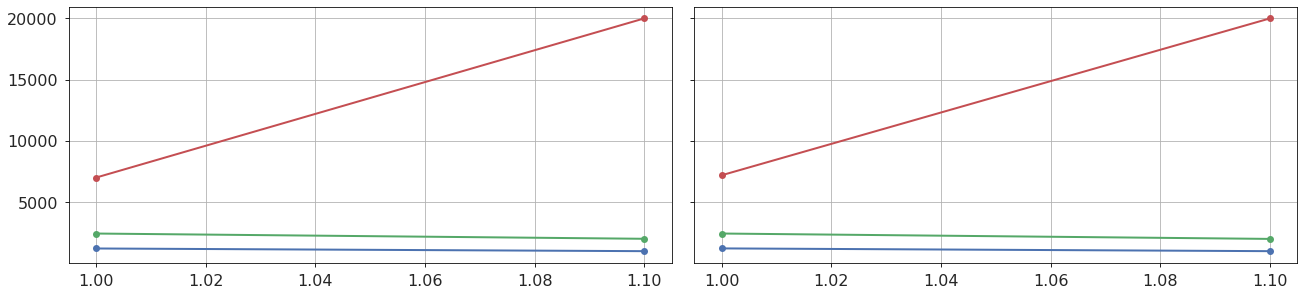

In [30]:
nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows, ncols, figsize=(18,4*nrows), constrained_layout=True, sharey=True)

for dd, ax in zip([orig, axb], axs):
    for xi in xilist:
        ax.plot(dd[xi].keys(), dd[xi].values(), ls='-', marker='o')

The two methods are basically equal in the number of iterations it takes to converge ... that's good

### Performance

Just comparing 10 iterations of the two methods, where number of iterations are fixed to 1,000

In [34]:
axb_time = []
org_time = []

for suff in [1,2,3]:
    
    time = pych.read_stdout_timing(f'/scratch2/tsmith/generic-matern-covariance/sampling/llc90/sor-3D-org{suff}-1.0-C/run.10dx.01xi/STDOUT.0000')
    org_time.append(time['ALL'])
    time = pych.read_stdout_timing(f'/scratch2/tsmith/generic-matern-covariance/sampling/llc90/sor-3D-axb{suff}-1.0-C/run.10dx.01xi/STDOUT.0000')
    axb_time.append(time['ALL'])
    

In [37]:
org_time

[99.0807120800018, 99.5257720947266, 101.608129024506]

In [38]:
axb_time

[100.206716060638, 98.368047952652, 99.0638899803162]

In [43]:
print(" --- axb method --- ")
!grep "Total barrier spins" '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/sor-3D-axb1-1.0-C/run.10dx.01xi/STDOUT.0000'
!grep "Total barrier spins" '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/sor-3D-axb2-1.0-C/run.10dx.01xi/STDOUT.0000'
!grep "Total barrier spins" '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/sor-3D-axb3-1.0-C/run.10dx.01xi/STDOUT.0000'

 --- axb method --- 
(PID.TID 0000.0001) //     Total barrier spins =         399021
(PID.TID 0000.0001) //     Total barrier spins =         399101
(PID.TID 0000.0001) //     Total barrier spins =         399165


In [42]:
print(" --- org method --- ")
!grep "Total barrier spins" '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/sor-3D-org1-1.0-C/run.10dx.01xi/STDOUT.0000'
!grep "Total barrier spins" '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/sor-3D-org2-1.0-C/run.10dx.01xi/STDOUT.0000'
!grep "Total barrier spins" '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/sor-3D-org3-1.0-C/run.10dx.01xi/STDOUT.0000'

 --- org method --- 
(PID.TID 0000.0001) //     Total barrier spins =         399069
(PID.TID 0000.0001) //     Total barrier spins =         399197
(PID.TID 0000.0001) //     Total barrier spins =         399069


Ok so really... they're equal..

In [47]:
ds = open_mdsdataset('/scratch2/tsmith/generic-matern-covariance/sampling/llc90/grid/',iters=None, geometry='llc')

/home/tsmith/xmitgcm/xmitgcm/mds_store.py:888: UserWarning: Couldn't find available_diagnostics.log in /scratch2/tsmith/generic-matern-covariance/sampling/llc90/grid/ or /scratch2/tsmith/generic-matern-covariance/sampling/llc90/grid/. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


In [48]:
sample = xr.DataArray(np.arange(10), coords={'sample':np.arange(10)},dims=('sample',))
fld = pe.read_single_mds('/scratch2/tsmith/generic-matern-covariance/sampling/llc90/sor-3D-axb1-1.0-C/run.10dx.01xi/smooth3Dfld001',
                         coords=ds.maskC.broadcast_like(sample).coords, dims=ds.maskC.broadcast_like(sample).dims)

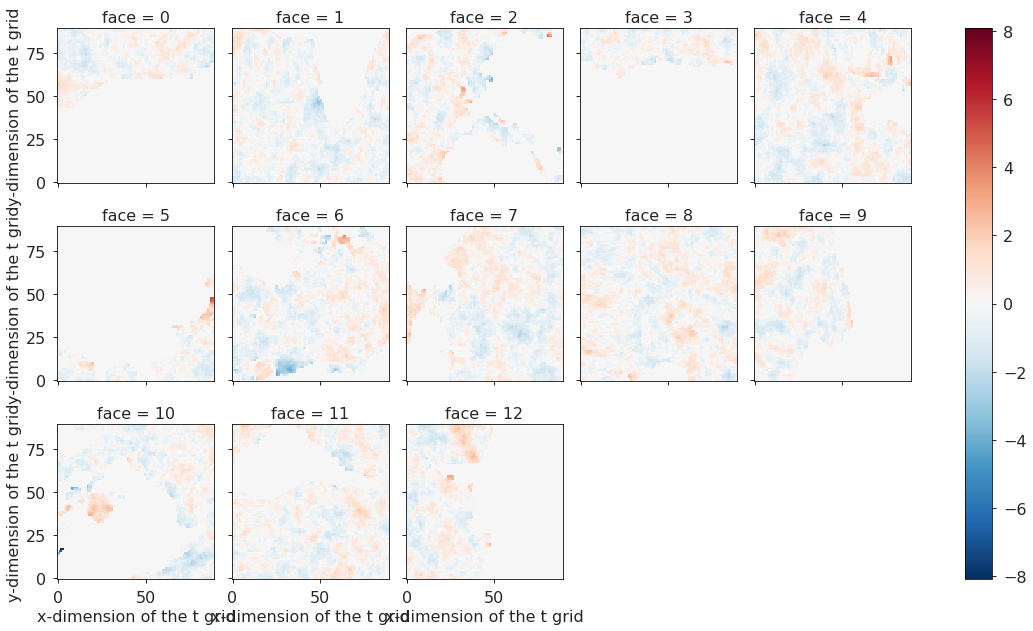

In [51]:
fld.isel(sample=0,k=0).plot(col='face',col_wrap=5)

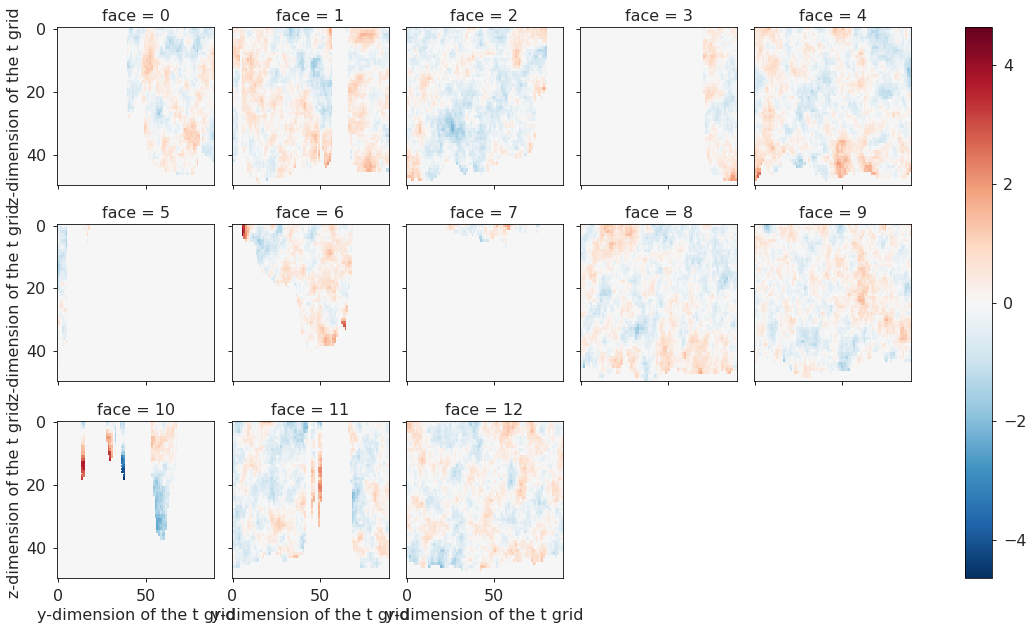

In [54]:
fld.isel(sample=1,i=0).plot(col='face',col_wrap=5, yincrease=False)

In [55]:
sample = xr.DataArray(np.arange(10), coords={'sample':np.arange(10)},dims=('sample',))
fld = pe.read_single_mds('/scratch2/tsmith/generic-matern-covariance/sampling/llc90/sor-3D-org1-1.0-C/run.10dx.01xi/smooth3Dfld001',
                         coords=ds.maskC.broadcast_like(sample).coords, dims=ds.maskC.broadcast_like(sample).dims)

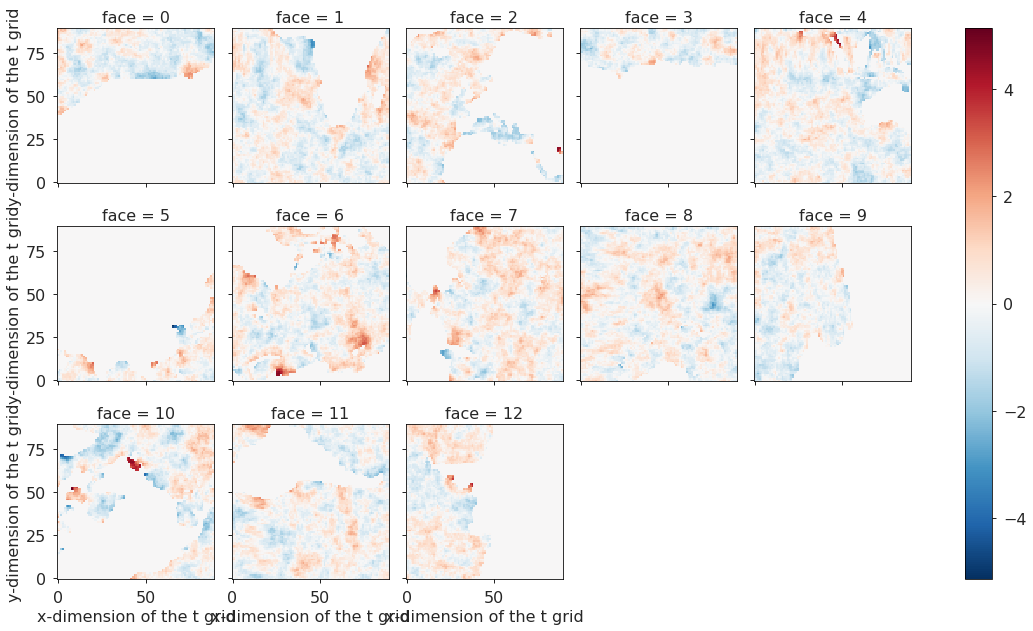

In [57]:
fld.isel(sample=0,k=0).plot(col='face',col_wrap=5)

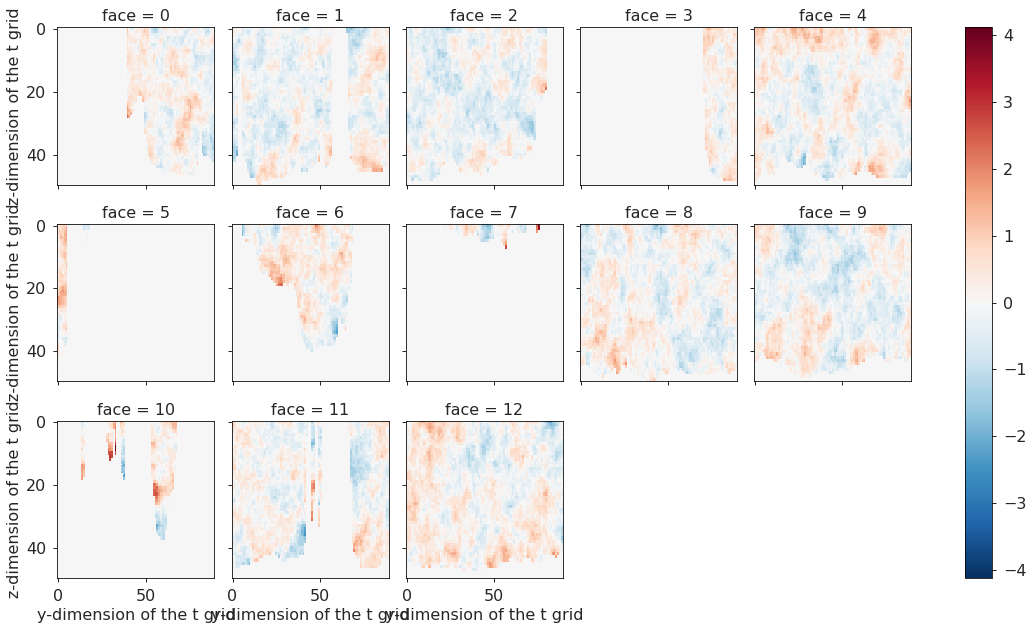

In [56]:
fld.isel(sample=1,i=0).plot(col='face',col_wrap=5, yincrease=False)